## Урок 8. Дисперсионный анализ. Логистическая регрессия

#### 1. Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: 

Футболисты: 173, 175, 180, 178, 177, 185, 183, 182. 

Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180. 

Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

In [169]:
import numpy as np

In [170]:
footbal = [173, 175, 180, 178, 177, 185, 183, 182]
hockey = [177, 179, 180, 188, 177, 172, 171, 184, 180]
bodybuilding = [172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170]
# footbal = [70, 50, 65, 60, 75]
# hockey = [80, 75, 90, 70, 75, 65, 85, 100]
# bodybuilding = [130, 100, 140, 150, 160, 170, 200]

In [171]:
nf = len(footbal)
nh = len(hockey)
nb = len(bodybuilding)
nf, nh, nb

(8, 9, 11)

In [172]:
k = 3

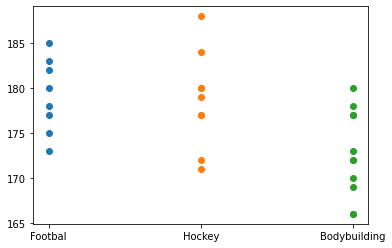

In [173]:
import matplotlib.pyplot as plt
plt.scatter(['Footbal' for _ in range(nf)], footbal)
plt.scatter(['Hockey' for _ in range(nh)], hockey)
plt.scatter(['Bodybuilding' for _ in range(nb)], bodybuilding)

Средний рост Футболистов и Хоккеистов вряд ли будут иметь статистически значимые различия. 
А средний рост Штангистов вероятно будет иметь статистически значимые различия со средними показателями роста Ф и Х.

In [174]:
yf = sum(footbal) / nf
yh = sum(hockey) / nh
yb = sum(bodybuilding) / nb
yf, yh, yb

(179.125, 178.66666666666666, 172.72727272727272)

In [175]:
Y = sum(footbal + hockey + bodybuilding) / (nf + nh + nb)
Y

176.46428571428572

In [176]:
S2 = sum((np.array(footbal + hockey + bodybuilding) - Y) ** 2)
S2

830.9642857142854

In [177]:
S2F = sum(((np.array([yf, yh, yb]) - Y) ** 2) * np.array([nf, nh, nb]))
S2F

253.9074675324678

In [178]:
S2rest = sum((np.array(footbal) - yf) ** 2) + sum((np.array(hockey) - yh) ** 2) + sum((np.array(bodybuilding) - yb) ** 2)
S2rest

577.0568181818181

In [179]:
S2check = S2F + S2rest
S2check

830.9642857142859

In [180]:
sigma2F = S2F / (k - 1)
sigma2F

126.9537337662339

In [181]:
sigma2rest = S2rest / (nf + nh + nb - k)
sigma2rest

23.082272727272724

In [182]:
F_obs = sigma2F / sigma2rest # расчетный критерий фишера
F_obs

5.500053450812599

In [183]:
# для dfмежд = 2 и dfвнутр = 28
F_table = 3.34

In [184]:
# Различия среднего роста среди взрослых футболистов, хоккеистов и штангистов есть
F_obs > F_table

True

In [185]:
from scipy import stats

In [186]:
stats.f_oneway(footbal, hockey, bodybuilding)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

In [187]:
# Различия среднего роста среди взрослых футболистов, хоккеистов и штангистов есть (альтерн. гипотеза)
stats.f_oneway(footbal, hockey, bodybuilding).pvalue < 0.05

True